In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pydotplus

# Diabetes Data Set - Classification 

In [2]:
P = pd.read_csv("prima-indians-diabetes.csv", header=None)
P.columns = ['NoofPreg','Glucose','BP','Skinth','Insulin','BMI','DPF','Age','Class']
P.head()

,NoofPreg,Glucose,BP,Skinth,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = P.drop(['Class'],axis=1)
Y = P['Class']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [4]:
train_acc = []
train_err = []
for i in range(1,11):
    df_tree = tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=i)
    df_tree = df_tree.fit(x_train,y_train)
    pred = df_tree.predict(x_train)
    CT = pd.crosstab(y_train,pred)
    acc = (CT[0][0]+CT[1][1])/(len(x_train))
    err = (CT[0][1]+CT[1][0])/(len(x_train))
    train_acc.append(acc)
    train_err.append(err)

In [5]:
test_acc = []
test_err = []
for i in range(1,11):
    df_tree = tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=i)
    df_tree = df_tree.fit(x_train,y_train)
    pred = df_tree.predict(x_test)
    CT = pd.crosstab(y_test,pred)
    acc = (CT[0][0]+CT[1][1])/(len(x_test))
    err = (CT[0][1]+CT[1][0])/(len(x_test))
    test_acc.append(acc)
    test_err.append(err)

In [6]:
max_acc = max(test_acc)
max_dep = test_acc.index(max_acc)+1
print("Maximum Depth : ",max_dep)

Maximum Depth :  5


In [7]:
d = pd.DataFrame([train_acc,test_acc,train_err,test_err]).T
d.columns = ['Train Accuracy','Test Accuracy','Train Error','Test Error']
d

,Train Accuracy,Test Accuracy,Train Error,Test Error
0,0.729981,0.753247,0.270019,0.246753
1,0.763501,0.757576,0.236499,0.242424
2,0.763501,0.757576,0.236499,0.242424
3,0.804469,0.761905,0.195531,0.238095
4,0.826816,0.766234,0.173184,0.233766
5,0.871508,0.731602,0.128492,0.268398
6,0.899441,0.727273,0.100559,0.272727
7,0.925512,0.727273,0.074488,0.272727
8,0.945996,0.705628,0.054004,0.294372
9,0.973929,0.692641,0.026071,0.307359


In [8]:
print(d[d['Test Accuracy']==max(test_acc)])
d.index[d['Test Accuracy']==max(test_acc)]

   Train Accuracy  Test Accuracy  Train Error  Test Error
4        0.826816       0.766234     0.173184    0.233766


Int64Index([4], dtype='int64')

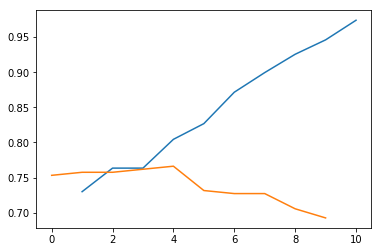

In [9]:
plt.plot(range(1,11),train_acc,test_acc)

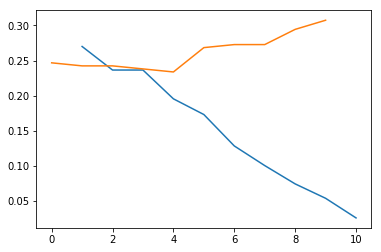

In [10]:
plt.plot(range(1,11),train_err,test_err)

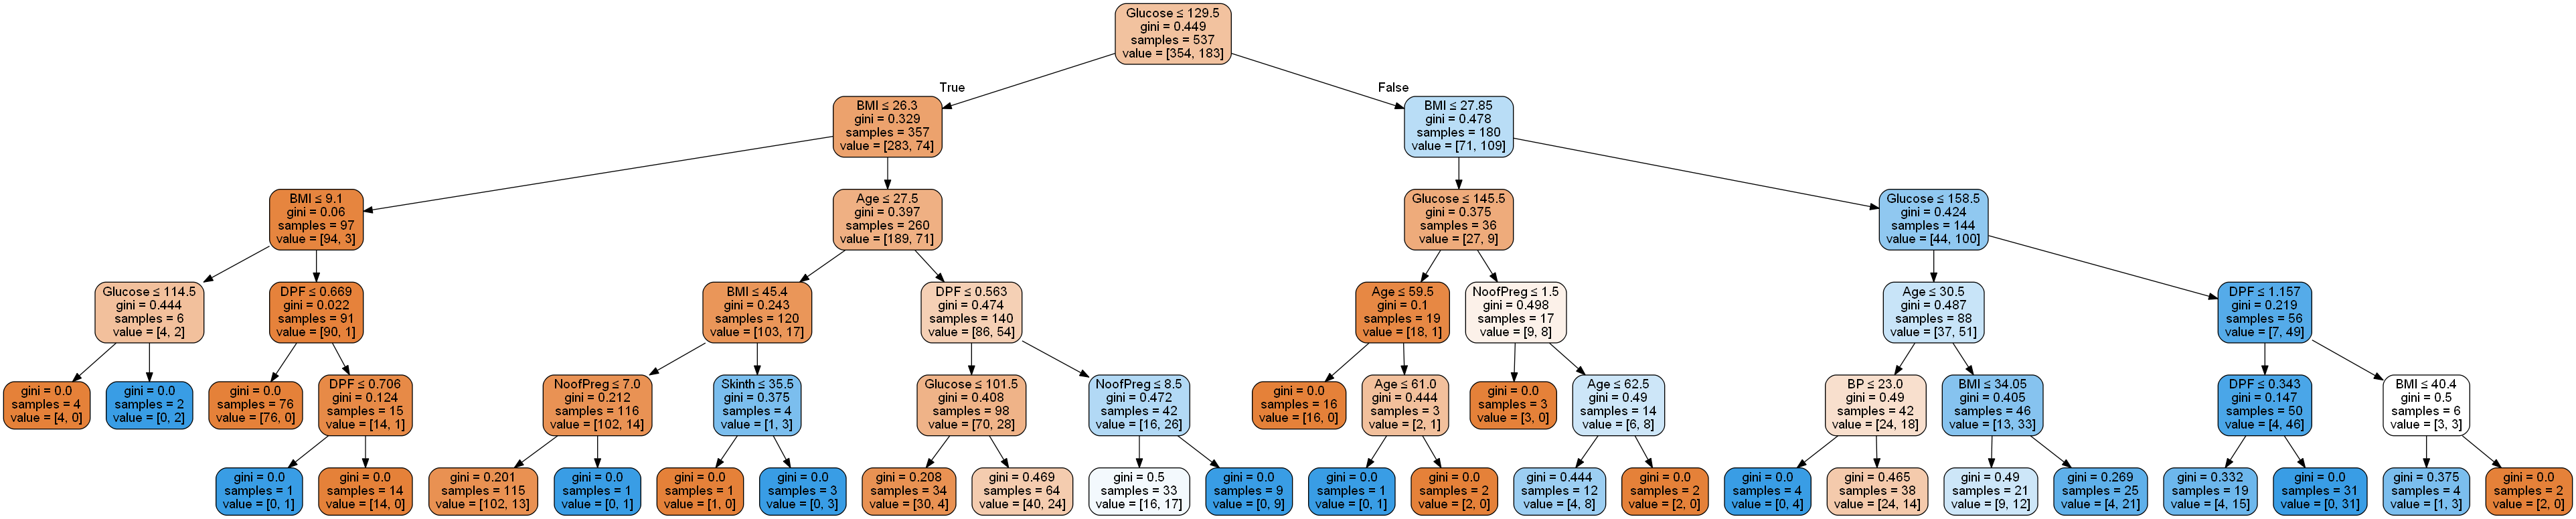

In [11]:
df_tree = tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=max_dep)
df_tree = df_tree.fit(x_train,y_train)
pred = df_tree.predict(x_test)
CT = pd.crosstab(y_test,pred)

mycols = ['NoofPreg','Glucose','BP','Skinth','Insulin','BMI','DPF','Age']
dot_data = StringIO()
export_graphviz(df_tree, out_file=dot_data, feature_names=mycols, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [12]:
rfc = RandomForestClassifier(n_estimators=500, max_features=2)
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
rfc = RandomForestClassifier(n_estimators=500, max_features=2)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
CT = pd.crosstab(y_test,pred)
CT

col_0,0,1
Class,,
0,129,17
1,32,53


In [14]:
acc = (CT[0][0]+CT[1][1])/(len(x_test))
err = (CT[0][1]+CT[1][0])/(len(x_test))
acc,err

(0.7878787878787878, 0.21212121212121213)

In [15]:
rfc = RandomForestClassifier(n_estimators=500, max_features=2)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_train)
CT = pd.crosstab(y_train,pred)
CT

col_0,0,1
Class,,
0,354,0
1,0,183


In [16]:
acc = (CT[0][0]+CT[1][1])/(len(x_train))
err = (CT[0][1]+CT[1][0])/(len(x_train))
acc,err

(1.0, 0.0)

In [17]:
rf_test_acc = []
rf_test_err = []
for i in range(1,9):
    rfc = RandomForestClassifier(n_estimators=500, max_features=i)
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    CT = pd.crosstab(y_test,pred)
    acc = (CT[0][0]+CT[1][1])/(len(x_test))
    err = (CT[0][1]+CT[1][0])/(len(x_test))
    rf_test_acc.append(acc)
    rf_test_err.append(err)
rf_test_acc

[0.7922077922077922,
 0.7878787878787878,
 0.7965367965367965,
 0.7965367965367965,
 0.8095238095238095,
 0.7878787878787878,
 0.7965367965367965,
 0.7922077922077922]

In [18]:
rf_train_acc = []
rf_train_err = []
for i in range(1,9):
    rfc = RandomForestClassifier(n_estimators=500, max_features=i)
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_train)
    CT = pd.crosstab(y_train,pred)
    acc = (CT[0][0]+CT[1][1])/(len(x_train))
    err = (CT[0][1]+CT[1][0])/(len(x_train))
    rf_train_acc.append(acc)
    rf_train_err.append(err)

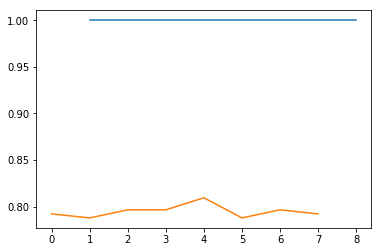

In [19]:
plt.plot(range(1,9),rf_train_acc,rf_test_acc)

In [20]:
features = P.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

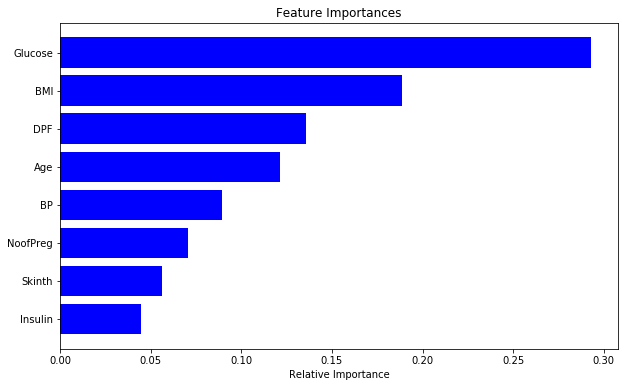

In [21]:
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

In [23]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, y_train) 

y_pred = classifier.predict(x_test) 

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[128  18]
 [ 30  55]]
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       146
          1       0.75      0.65      0.70        85

avg / total       0.79      0.79      0.79       231



In [24]:
knn_error = []
knn_acc = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    CT = pd.crosstab(y_test,pred)
    acc = (CT[0][0]+CT[1][1])/(len(x_test))
    err = (CT[0][1]+CT[1][0])/(len(x_test))
    knn_acc.append(acc)
    knn_error.append(err)

Text(0,0.5,'Mean Error')

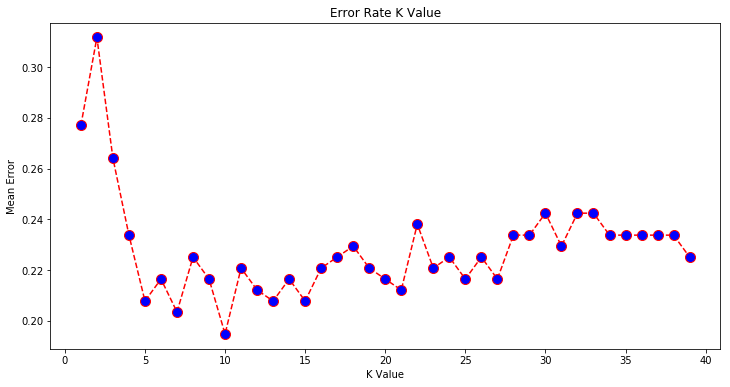

In [25]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), knn_error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

Text(0,0.5,'Mean Accuracy')

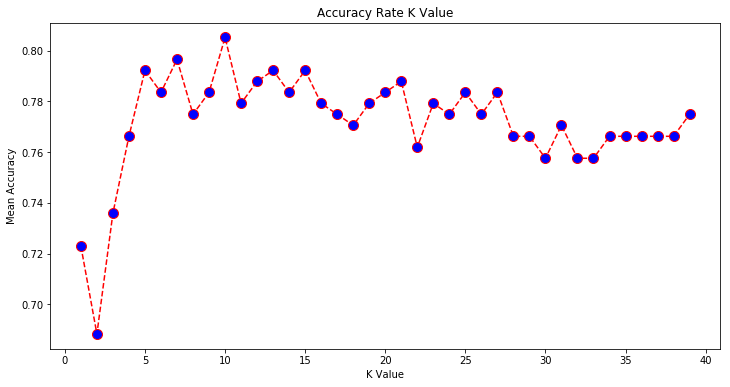

In [26]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), knn_acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy')

In [27]:
max_acc = max(knn_acc)
max_dep = knn_acc.index(max_acc)+1
print("Maximum Depth : ",max_dep)

Maximum Depth :  10


In [28]:
knn = KNeighborsClassifier(n_neighbors=max_dep)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
CT = pd.crosstab(y_test,pred)
acc = (CT[0][0]+CT[1][1])/(len(x_test))
err = (CT[0][1]+CT[1][0])/(len(x_test))
acc,err

(0.8051948051948052, 0.19480519480519481)

In [29]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=100, gamma=1)
model.fit(x_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
print("Train Accuracy : ", model.score(x_train,y_train))
print("Test Accuracy : ", model.score(x_test,y_test))

Train Accuracy :  0.7783985102420856
Test Accuracy :  0.7922077922077922


In [31]:
from sklearn.model_selection import GridSearchCV
k = ['linear']
c = range(1,5)
g = np.arange(0.1,1,0.1)
param_grid = dict(kernel=k, C=c, gamma=g)
new_model = SVC()
grid = GridSearchCV(new_model, param_grid, scoring='accuracy', cv=5) # Works without cv=5 also

In [32]:
param_grid

{'kernel': ['linear'],
 'C': range(1, 5),
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}

In [33]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': range(1, 5), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [35]:
model_final = SVC(kernel='linear', C=1, gamma=0.1)
model_final.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
print("Train Accuracy : ", model_final.score(x_train,y_train))
print("Test Accuracy : ", model_final.score(x_test,y_test))

Train Accuracy :  0.7746741154562383
Test Accuracy :  0.7922077922077922


In [37]:
from sklearn.cross_validation import cross_val_score

In [38]:
features = mycols

x = P[mycols]
y = P['Class']

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=5)
    depth.append((i,scores.mean()))
depth

[(3, 0.7291656056361939),
 (4, 0.731822425940073),
 (5, 0.7513793396146337),
 (6, 0.7240132416603006),
 (7, 0.7422544775485951),
 (8, 0.7174857821916645),
 (9, 0.7097020626432391),
 (10, 0.6850097614803496),
 (11, 0.7097190391308039),
 (12, 0.7084712672947967),
 (13, 0.7032085561497327),
 (14, 0.721441303794245),
 (15, 0.7149308208131738),
 (16, 0.7175367116543587),
 (17, 0.7162549868432222),
 (18, 0.721441303794245),
 (19, 0.7162464985994397)]

In [39]:
depth = []
for i in range(1,21):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=5)
    depth.append((scores.mean()))
depth

[0.7149950691301422,
 0.7205855652866762,
 0.711308999000764,
 0.7262100224011704,
 0.7022584037043569,
 0.6686471783015602,
 0.6909565887523919,
 0.6891739650071513,
 0.6908344599228041,
 0.6778541899331882,
 0.6703595942971714,
 0.6704291489514554,
 0.6816274482911759,
 0.6779410516141251,
 0.6834789735953551,
 0.6814700523129371,
 0.6517359274280452,
 0.6834440329943768,
 0.6648213457682687,
 0.666690831194446]

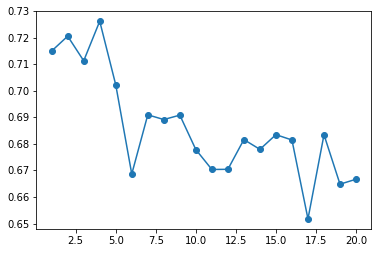

In [40]:
plt.plot(range(1,21),depth,'-o')

In [41]:
max_acc = max(depth)
max_dep = depth.index(max_acc)+1
print("Maximum Depth : ",max_dep)

Maximum Depth :  4


In [42]:
df_tree = tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=max_dep)
df_tree = df_tree.fit(x_train,y_train)
pred = df_tree.predict(x_test)
CT = pd.crosstab(y_test,pred)
acc = (CT[0][0]+CT[1][1])/(len(x_test))
err = (CT[0][1]+CT[1][0])/(len(x_test))
acc,err

(0.7619047619047619, 0.23809523809523808)

# Fair Pay Dataset - Regression

In [130]:
F = pd.read_csv("fair_pay_data.csv")
F.head()

,employee_id,department,salary,new_hire,job_level
0,1,Sales,103263.63550,No,Salaried
1,2,Engineering,80708.64104,No,Hourly
2,4,Engineering,60737.04786,Yes,Hourly
3,5,Engineering,99116.32328,Yes,Salaried
4,7,Engineering,51021.64386,No,Hourly


In [131]:
F = pd.get_dummies(F,columns=['job_level','new_hire','department'])
F.head()

,employee_id,salary,job_level_Hourly,job_level_Manager,job_level_Salaried,new_hire_No,new_hire_Yes,department_Engineering,department_Finance,department_Sales
0,1,103263.63550,0,0,1,1,0,0,0,1
1,2,80708.64104,1,0,0,1,0,1,0,0
2,4,60737.04786,1,0,0,0,1,1,0,0
3,5,99116.32328,0,0,1,0,1,1,0,0
4,7,51021.64386,1,0,0,1,0,1,0,0


In [31]:
X = F.drop(['salary','employee_id'],axis=1)
Y = F['salary']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [32]:
L = []
M = []
for i in range(1,11):
    df_tree = tree.DecisionTreeRegressor(random_state=1,max_depth=i)
    df_tree = df_tree.fit(x_train,y_train)
    pred = df_tree.predict(x_test)
    RMSE = np.sqrt(np.mean((y_test-pred)**2))
    MAPE = np.mean(np.absolute((y_test-pred)/pred))
    L.append(RMSE)
    M.append(MAPE)

In [33]:
L

[10946.418636397122,
 8804.33463083648,
 8815.132984303744,
 8822.74447324532,
 8837.062581662334,
 8837.062581662338,
 8837.062581662338,
 8837.062581662338,
 8837.062581662338,
 8837.062581662338]

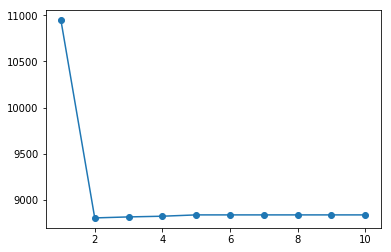

In [34]:
plt.plot(range(1,11),L,'-o')

In [35]:
M

[0.12150530471191308,
 0.10669940958550135,
 0.10679834178310765,
 0.10680969129525032,
 0.10699126135665381,
 0.1069912613566539,
 0.1069912613566539,
 0.1069912613566539,
 0.1069912613566539,
 0.1069912613566539]

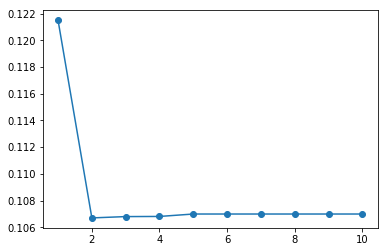

In [36]:
plt.plot(range(1,11),M,'-o')

In [37]:
min_rmse = min(L)
max_dep = L.index(min_rmse)+1
print("Minimum Depth : ",max_dep)

Minimum Depth :  2


In [38]:
F.columns

Index(['employee_id', 'salary', 'job_level_Hourly', 'job_level_Manager',
       'job_level_Salaried', 'new_hire_No', 'new_hire_Yes',
       'department_Engineering', 'department_Finance', 'department_Sales'],
      dtype='object')

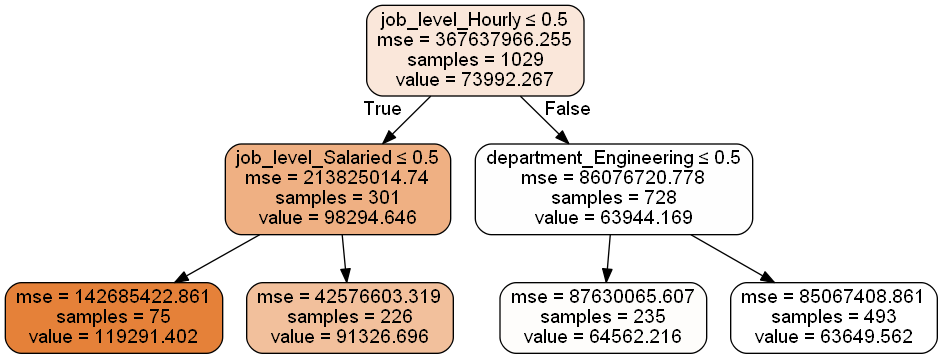

In [39]:
df_tree = tree.DecisionTreeRegressor(random_state=1,max_depth=max_dep)
df_tree = df_tree.fit(x_train,y_train)
pred = df_tree.predict(x_test)
CT = pd.crosstab(y_test,pred)

mycols = ['job_level_Hourly', 'job_level_Manager',
       'job_level_Salaried', 'new_hire_No', 'new_hire_Yes',
       'department_Engineering', 'department_Finance', 'department_Sales']
dot_data = StringIO()
export_graphviz(df_tree, out_file=dot_data, feature_names=mycols, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [40]:
rfc = RandomForestRegressor(n_estimators=500, max_features=2)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_train)
RMSE = np.sqrt(np.mean((y_train-pred)**2))
MAPE = np.mean(np.absolute((y_train-pred)/pred))
RMSE,MAPE

(8947.035916060293, 0.10616946001178364)

In [41]:
rfc = RandomForestRegressor(n_estimators=500, max_features=2)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
RMSE = np.sqrt(np.mean((y_test-pred)**2))
MAPE = np.mean(np.absolute((y_test-pred)/pred))
RMSE,MAPE

(8836.615374321636, 0.10693485350791618)

In [42]:
rf_test_rmse = []
rf_test_mape = []
for i in range(1,9):
    rfc = RandomForestRegressor(n_estimators=500, max_features=i)
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    RMSE = np.sqrt(np.mean((y_test-pred)**2))
    MAPE = np.mean(np.absolute((y_test-pred)/pred))
    rf_test_rmse.append(RMSE)
    rf_test_mape.append(MAPE)

In [43]:
rf_train_rmse = []
rf_train_mape = []
for i in range(1,9):
    rfc = RandomForestRegressor(n_estimators=500, max_features=i)
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_train)
    RMSE = np.sqrt(np.mean((y_train-pred)**2))
    MAPE = np.mean(np.absolute((y_train-pred)/pred))
    rf_train_rmse.append(RMSE)
    rf_train_mape.append(MAPE)

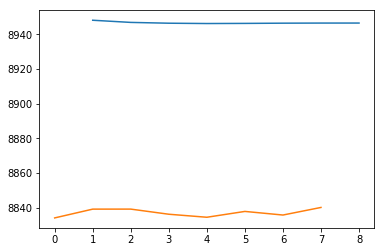

In [44]:
plt.plot(range(1,9),rf_train_rmse,rf_test_rmse)

In [45]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

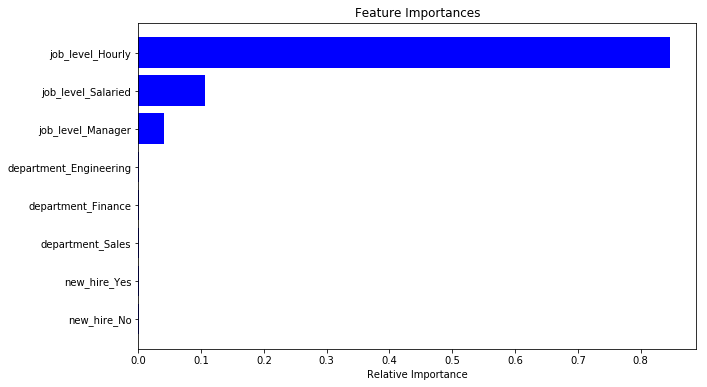

In [46]:
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [47]:
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

In [48]:
from sklearn.neighbors import KNeighborsRegressor  
regressor = KNeighborsRegressor(n_neighbors=5)  
regressor.fit(x_train, y_train) 

pred = regressor.predict(x_test) 

RMSE = np.sqrt(np.mean((y_test-pred)**2))
MAPE = np.mean(np.absolute((y_test-pred)/pred))
RMSE,MAPE

(9232.652725613114, 0.11379623674536636)

In [49]:
knn_test_rmse = []
knn_test_mape = []
for i in range(1, 40):  
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    RMSE = np.sqrt(np.mean((y_test-pred)**2))
    MAPE = np.mean(np.absolute((y_test-pred)/pred))
    knn_test_rmse.append(RMSE)
    knn_test_mape.append(MAPE)

Text(0,0.5,'RMSE')

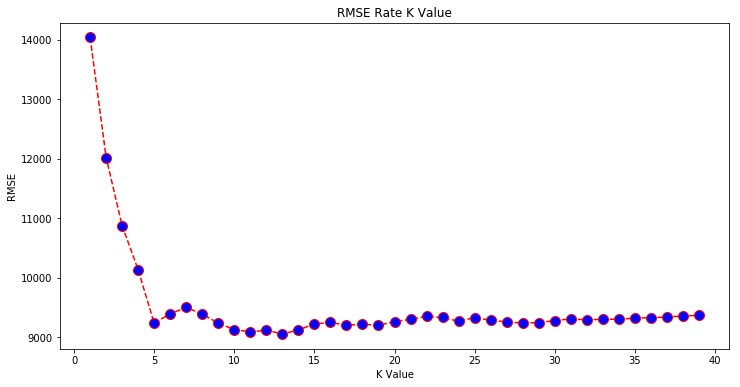

In [50]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), knn_test_rmse, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('RMSE Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('RMSE')

Text(0,0.5,'Mean MAPE')

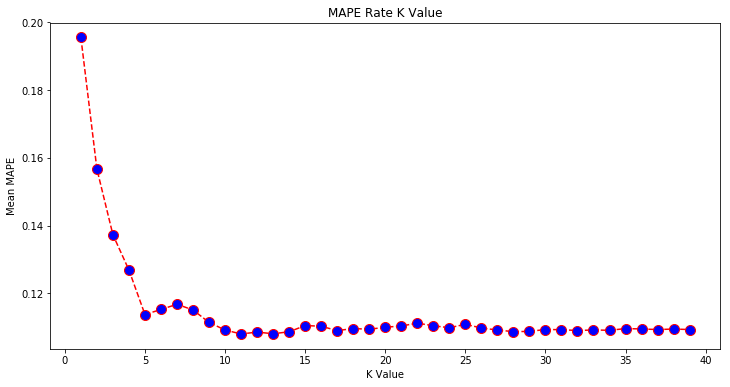

In [51]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), knn_test_mape, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('MAPE Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean MAPE')